In [89]:
!pip install sparknlp

In [5]:
!pip install pyspark 

  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=85fe2ea121499054fe625fb6cab56a8edca9930b7b5fef17401d836622af2eb5
  Stored in directory: c:\users\tfls_\appdata\local\pip\cache\wheels\9f\f5\07\7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [14]:
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

'apt' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


In [6]:
import sparknlp
from sparknlp.pretrained import PretrainedPipeline

In [87]:
!pip install spark-nlp==3.4.3 pyspark==3.1.2

  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=c0fc9fb546d9c228220a67a345585b53d0f2a1ebe790910a11040bfb87dcc05c
  Stored in directory: c:\users\tfls_\appdata\local\pip\cache\wheels\a5\0a\c1\9561f6fecb759579a7d863dcd846daaa95f598744e71b02c77
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.3
    Uninstalling py4j-0.10.9.3:
      Successfully uninstalled py4j-0.10.9.3
  Attempting uninstall: pyspark
    Found existing installation: pyspark 3.2.1
    Uninstalling pyspark-3.2.1:


ERROR: Could not install packages due to an OSError: [WinError 32] 另一个程序正在使用此文件，进程无法访问。: 'c:\\users\\tfls_\\.conda\\envs\\python37\\lib\\site-packages\\pyspark\\jars\\activation-1.1.1.jar'
Consider using the `--user` option or check the permissions.



In [68]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .appName("Spark NLP")\
    .master("local[4]")\
    .config("spark.driver.memory","16G")\
    .config("spark.driver.maxResultSize", "0") \
    .config("spark.kryoserializer.buffer.max", "2000M")\
    .config("spark.jars.packages", "com.johnsnowlabs.nlp:spark-nlp_2.12:3.4.3")\
    .getOrCreate()

In [75]:
spark = sparknlp.start()

In [77]:
spark.version
sparknlp.version()

'3.4.3'

In [88]:
# Import Spark NLP
from sparknlp.base import *
from sparknlp.annotator import *
from sparknlp.pretrained import PretrainedPipeline
import sparknlp

# Start SparkSession with Spark NLP
# start() functions has 5 parameters: gpu, spark23, spark24, spark32, and memory
# sparknlp.start(gpu=True) will start the session with GPU support
# sparknlp.start(spark23=True) is when you have Apache Spark 2.3.x installed
# sparknlp.start(spark24=True) is when you have Apache Spark 2.4.x installed
# sparknlp.start(spark32=True) is when you have Apache Spark 3.2.x installed
# sparknlp.start(memory="16G") to change the default driver memory in SparkSession
spark = sparknlp.start()

# Download a pre-trained pipeline
pipeline = PretrainedPipeline('explain_document_dl', lang='en')

# Your testing dataset
text = """
The Mona Lisa is a 16th century oil painting created by Leonardo.
It's held at the Louvre in Paris.
"""

# Annotate your testing dataset
result = pipeline.annotate(text)

# What's in the pipeline
list(result.keys())
Output: ['entities', 'stem', 'checked', 'lemma', 'document',
'pos', 'token', 'ner', 'embeddings', 'sentence']

# Check the results
result['entities']
Output: ['Mona Lisa', 'Leonardo', 'Louvre', 'Paris']

explain_document_dl download started this may take some time.


TypeError: 'JavaPackage' object is not callable

In [158]:
data = spark.read.csv(r'C:\Users\tfls_\Documents\GitHub\bigdata\DisneylandReviews.csv',inferSchema=True,header=True)

In [159]:
data.show()

+---------+------+----------+--------------------+--------------------+-------------------+
|Review_ID|Rating|Year_Month|   Reviewer_Location|         Review_Text|             Branch|
+---------+------+----------+--------------------+--------------------+-------------------+
|670772142|     4|    2019-4|           Australia|If you've ever be...|Disneyland_HongKong|
|670682799|     4|    2019-5|         Philippines|Its been a while ...|Disneyland_HongKong|
|670623270|     4|    2019-4|United Arab Emirates|Thanks God it was...|Disneyland_HongKong|
|670607911|     4|    2019-4|           Australia|HK Disneyland is ...|Disneyland_HongKong|
|670607296|     4|    2019-4|      United Kingdom|the location is n...|Disneyland_HongKong|
|670591897|     3|    2019-4|           Singapore|Have been to Disn...|Disneyland_HongKong|
|670585330|     5|    2019-4|               India|Great place! Your...|Disneyland_HongKong|
|670574142|     3|    2019-3|            Malaysia|Think of it as an...|Disneylan

In [163]:
from pyspark.ml.feature import Tokenizer, StopWordsRemover, RegexTokenizer, NGram, MinHashLSH, HashingTF
from pyspark.ml import Pipeline
from pyspark.ml.linalg import Vectors
from pyspark.sql import functions as F

In [161]:
tokenizer = RegexTokenizer(inputCol="Review_Text", outputCol="lowercase")
remover = StopWordsRemover(inputCol=tokenizer.getOutputCol(), outputCol="removed")
pipeline1 = Pipeline(stages=[tokenizer,remover])

In [164]:
tmp = pipeline1.fit(data)
data_transformed = tmp.transform(data)
data_transformed = data_transformed.withColumn("concat", F.concat_ws(",",F.col("removed")))

In [166]:
data_transformed.show()

+---------+------+----------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+
|Review_ID|Rating|Year_Month|   Reviewer_Location|         Review_Text|             Branch|           lowercase|             removed|              concat|
+---------+------+----------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+
|670772142|     4|    2019-4|           Australia|If you've ever be...|Disneyland_HongKong|[if, you've, ever...|[ever, disneyland...|ever,disneyland,a...|
|670682799|     4|    2019-5|         Philippines|Its been a while ...|Disneyland_HongKong|[its, been, a, wh...|[since, d, last, ...|since,d,last,time...|
|670623270|     4|    2019-4|United Arab Emirates|Thanks God it was...|Disneyland_HongKong|[thanks, god, it,...|[thanks, god, was...|thanks,god,wasn,h...|
|670607911|     4|    2019-4|           Australia|HK Disneyland is ...

In [167]:
data_new = data_transformed.toPandas()

In [168]:
data_new

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,lowercase,removed,concat
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,"[if, you've, ever, been, to, disneyland, anywh...","[ever, disneyland, anywhere, find, disneyland,...","ever,disneyland,anywhere,find,disneyland,hong,..."
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,"[its, been, a, while, since, d, last, time, we...","[since, d, last, time, visit, hk, disneyland, ...","since,d,last,time,visit,hk,disneyland,..,yet,,..."
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,"[thanks, god, it, wasn, t, too, hot, or, too, ...","[thanks, god, wasn, hot, humid, visiting, park...","thanks,god,wasn,hot,humid,visiting,park,otherw..."
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,"[hk, disneyland, is, a, great, compact, park.,...","[hk, disneyland, great, compact, park., unfort...","hk,disneyland,great,compact,park.,unfortunatel..."
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,"[the, location, is, not, in, the, city,, took,...","[location, city,, took, around, 1, hour, kowlo...","location,city,,took,around,1,hour,kowlon,,kids..."
...,...,...,...,...,...,...,...,...,...
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris,"[i, went, to, disneyland, paris, in, july, 03,...","[went, disneyland, paris, july, 03, thought, b...","went,disneyland,paris,july,03,thought,brillian..."
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris,"[2, adults, and, 1, child, of, 11, visited, di...","[2, adults, 1, child, 11, visited, disneyland,...","2,adults,1,child,11,visited,disneyland,paris,b..."
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris,"[my, eleven, year, old, daughter, and, myself,...","[eleven, year, old, daughter, went, visit, son...","eleven,year,old,daughter,went,visit,son,london..."
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris,"[this, hotel,, part, of, the, disneyland, pari...","[hotel,, part, disneyland, paris, complex,, wo...","hotel,,part,disneyland,paris,complex,,wonderfu..."


In [174]:
data_new["new_column"] = data_new['concat'].str.replace(',',' ')

In [175]:
data_new["new_column"]

0        ever disneyland anywhere find disneyland hong ...
1        since d last time visit hk disneyland .. yet  ...
2        thanks god wasn hot humid visiting park otherw...
3        hk disneyland great compact park. unfortunatel...
4        location city  took around 1 hour kowlon  kids...
                               ...                        
42651    went disneyland paris july 03 thought brillian...
42652    2 adults 1 child 11 visited disneyland paris b...
42653    eleven year old daughter went visit son london...
42654    hotel  part disneyland paris complex  wonderfu...
42655    went disneyparis resort  1996  small child. mi...
Name: new_column, Length: 42656, dtype: object

In [73]:
from sparknlp.pretrained import PretrainedPipeline 
from sparknlp.base import DocumentAssembler

In [74]:
documentAssembler = DocumentAssembler().setInputCol("Review_Text").setOutputCol("document")

TypeError: 'JavaPackage' object is not callable

In [34]:
import com.johnsnowlabs.nlp.base._
import com.johnsnowlabs.nlp.annotator._
import com.johnsnowlabs.nlp.annotators.ner.NerConverter
import org.apache.spark.ml.Pipeline

ModuleNotFoundError: No module named 'com.johnsnowlabs.nlp.base._'; 'com.johnsnowlabs.nlp.base' is not a package

In [60]:
!pip install spark-nlp==3.4.3

In [67]:
!spark-shell --packages com.johnsnowlabs.nlp:spark-nlp_2.12:3.4.3

Traceback (most recent call last):
  File "C:\Users\tfls_\.conda\envs\python37\Scripts\find_spark_home.py", line 86, in <module>
    print(_find_spark_home())
  File "C:\Users\tfls_\.conda\envs\python37\Scripts\find_spark_home.py", line 52, in _find_spark_home
    module_home = os.path.dirname(find_spec("pyspark").origin)
AttributeError: 'NoneType' object has no attribute 'origin'
系统找不到指定的路径。


In [38]:
!pip install nltk

In [151]:
import pandas as pd
import numpy as np

In [91]:
data = pd.read_csv(r"C:\Users\tfls_\Documents\GitHub\bigdata\DisneylandReviews.csv",encoding='latin-1')

In [106]:
import nltk
import matplotlib.pyplot as plt

In [93]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tfls_\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [94]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [95]:
sid = SentimentIntensityAnalyzer()

In [176]:
data_new["Score"] =data_new["new_column"].apply(lambda review: sid.polarity_scores(review))

In [178]:
data_new["Compound_Score"] =data_new["Score"].apply(lambda d:d["compound"])
data_new.drop("Score",axis= 1,inplace=True)

In [179]:
data_new.groupby("Rating")["Compound_Score"].describe()

,count,mean,std,min,25%,50%,75%,max
Rating,,,,,,,,
1,1499.0,0.107302,0.717019,-0.9901,-0.64205,0.2732,0.82485,0.9992
2,2127.0,0.368845,0.646438,-0.9879,-0.15580,0.6670,0.91000,0.9990
3,5109.0,0.568513,0.530098,-0.9799,0.40840,0.8176,0.94450,0.9991
4,10775.0,0.771006,0.344839,-0.9926,0.75060,0.9097,0.96630,0.9998
5,23146.0,0.823145,0.268583,-0.9337,0.80700,0.9231,0.96940,0.9999


In [185]:
data_new.groupby("Branch")["Compound_Score"].describe()['mean']

Branch
Disneyland_California    0.738856
Disneyland_HongKong      0.748182
Disneyland_Paris         0.709778
Name: mean, dtype: float64

In [112]:
data[data['Rating']==1]['Compound_Score']

101      0.4215
144     -0.4402
236     -0.6083
255      0.7866
264     -0.7330
          ...  
42572   -0.9680
42573    0.9883
42608   -0.2729
42609    0.8974
42635    0.7974
Name: Compound_Score, Length: 1499, dtype: float64

In [109]:
data["Rating"]

0        4
1        4
2        4
3        4
4        4
        ..
42651    5
42652    5
42653    5
42654    4
42655    4
Name: Rating, Length: 42656, dtype: int64

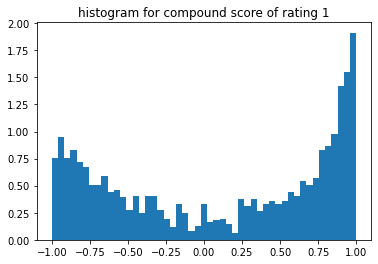

In [189]:
bins = np.linspace(-1, 1, 50)
plt.hist(data_new[data_new['Rating']==1]['Compound_Score'],bins, density=True)
plt.title("histogram for compound score of rating 1")
plt.show()

In [224]:
pd.options.display.max_colwidth = 2000

In [227]:
data_new[(data_new['Rating']==1)&(data_new['Compound_Score']>0.99)]['Review_Text'][12:13]

34230    I am writing this with a heavy heart having visited this attraction practically every year at Easter for the past 10 years. In fact, we were so disappointed by our experience this time that we probably won't be going back. WHY?With three kids, all under the age of 12, we go there for the rides. However, the following were all closed last week:Practically everything at FRONTIERLAND including:1. Big Thunder Mountain (Fastpass)2. Phantom Manor3. Thunder Mesa Riverboat Landing4. Pocahontas Indian VillageMost of ADVENTURELAND including:5. La Cabane des Robinson6. Pirates' Beach7. Adventure IsleAt FANTASYLAND:8. Peter Pan's Flight (Fastpass)And at DISCOVERYLAND:9. Star Wars (Fastpass)So of the 6 feature attractions (Fastpass), HALF OF THEM WERE CLOSED. And the total (9) equates to about a third of the park!And to compound this, with tickets for access to both parks, the Rock 'n' Roller Coaster (Faspass) at Walt Disney Studios were closed too! They do publish attractions that are clo

In [220]:
data_new[(data_new['Rating']==5)&(data_new['Compound_Score']<-0.9)]['Review_Text'][2:3]

35726    Went for five days with the kids. Hate queuing. Hate paying over the odds. Hate marketing machines. Hate the poor food selections.Take a water bottle with you. Or buy a bottle. The refill for the rest of your stay at the drink fountains. We had a hot week and it was a godsend. Don't miss the closing ceremony or the parade: the smile on my kids faces bring tears to your eyes and make the who cost queuing worthwhile.Fabulous staff.
Name: Review_Text, dtype: object

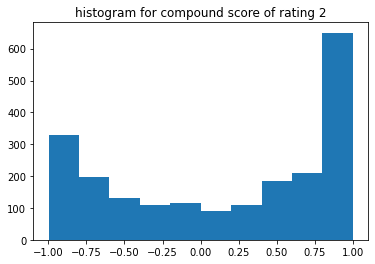

In [121]:
plt.hist(data[data['Rating']==2]['Compound_Score'])
plt.title("histogram for compound score of rating 2")
plt.show()

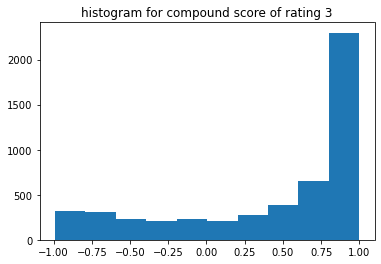

In [122]:
plt.hist(data[data['Rating']==3]['Compound_Score'])
plt.title("histogram for compound score of rating 3")
plt.show()

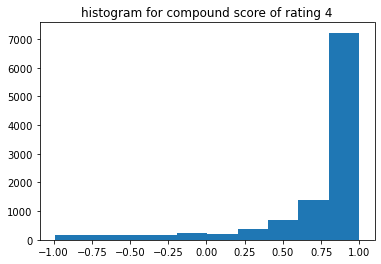

In [123]:
plt.hist(data[data['Rating']==4]['Compound_Score'])
plt.title("histogram for compound score of rating 4")
plt.show()

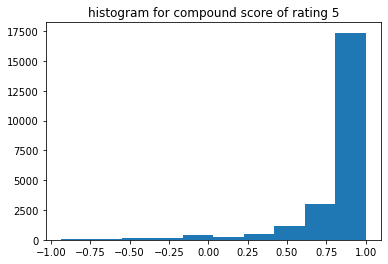

In [228]:
plt.hist(data_new[data_new['Rating']==5]['Compound_Score'])
plt.title("histogram for compound score of rating 5")
plt.show()

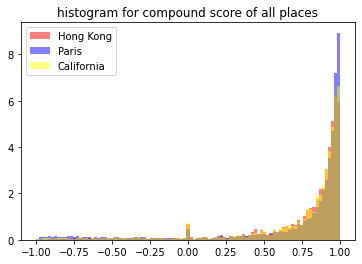

In [183]:
bins = np.linspace(-1, 1, 100)
plt.hist(data_new[data_new['Branch']=='Disneyland_HongKong']['Compound_Score'], bins,color = 'red', density=True, stacked=True, alpha=0.5, label='Hong Kong')
plt.hist(data_new[data_new['Branch']=='Disneyland_Paris']['Compound_Score'], bins,color = 'blue', density=True, stacked=True,alpha=0.5, label='Paris')
plt.hist(data_new[data_new['Branch']=='Disneyland_California']['Compound_Score'], bins,color = 'yellow', density=True, stacked=True,alpha=0.5, label='California')
plt.title("histogram for compound score of all places")
plt.legend(loc='upper left')
plt.show()
#plt.show()

In [100]:
data

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Compound_Score
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,0.7069
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,0.9901
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,0.9920
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,0.8489
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,0.2846
...,...,...,...,...,...,...,...
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris,0.9860
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris,0.9909
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris,0.8402
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris,0.9538
